# Principal Component Analysis (PCA) in Python
**Learn about PCA and how it can be leveraged to extract information from the data without any supervision using two popular datasets: Breast Cancer and CIFAR-10.**

## Introduction

Principal Component Analysis (PCA) is a **linear dimensionality reduction** technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

One important thing to note about PCA is that it is an **Unsupervised** dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels), and you will learn how to achieve this practically using Python in later sections of this tutorial!

According to *Wikipedia*, PCA is a **statistical** procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

**Note**: Features, Dimensions, and Variables are all referring to the same thing. You will find them being used interchangeably.

#### But where can you apply PCA?

- **Data Visualization**: When working on any data related problem, the challenge in today's world is the sheer volume of data, and the variables/features that define that data. To solve a problem where data is the key, you need extensive data exploration like finding out how the variables are correlated or understanding the distribution of a few variables. Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible.

    Hence, PCA can do that for you since it projects the data into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space with a naked eye.

- **Speeding Machine Learning (ML) Algorithm**: Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.

At an abstract level,  you take a dataset having many features, and you simplify that dataset by selecting a few ``Principal Components`` from original features.

#### What is a Principal Component?

Principal components are the key to PCA; they represent what's underneath the hood of your data. In a layman term, when the data is projected into a lower dimension (assume three dimensions) from a higher space, the three dimensions are nothing but the three Principal Components that captures (or holds) most of the variance (information) of your data.

Principal components have both direction and magnitude. The direction represents across which *principal axes* the data is mostly spread out or has most variance and the magnitude signifies the amount of variance that Principal Component captures of the data when projected onto that axis. The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent principal component is orthogonal to the last and has a lesser variance. In this way, given a set of <i>x</i> correlated variables over <i>y</i> samples you achieve a set of <i>u</i> uncorrelated principal components over the same <i>y</i> samples.

The reason you achieve uncorrelated principal components from the original features is that the correlated features contribute to the same principal component, thereby reducing the original data features into uncorrelated principal components; each representing a different set of correlated features with different amounts of variation.

Each principal component represents a percentage of total variation captured from the data.

In today's tutorial, you will mainly apply PCA on the two use-cases:
- ``Data Visualization``
- ``Speeding ML algorithm``

To accomplish the above two tasks, you will use two famous Breast Cancer (numerical) and CIFAR - 10 (image) dataset.

## Understanding the Data

Before you go ahead and load the data, it's good to understand and look at the data that you will be working with!

### Breast Cancer

The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign.

The malignant class has 212 samples, whereas the benign class has 357 samples.

It has 30 features shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.

You can download the breast cancer dataset from <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">here</a>, or rather an easy way is by loading it with the help of the ``sklearn`` library.

### CIFAR - 10

The CIFAR-10 (Canadian Institute For Advanced Research) dataset consists of 60000 images each of 32x32x3 color images having ten classes, with 6000 images per category.

The dataset consists of 50000 training images and 10000 test images.

The classes in the dataset are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.

You can download the CIFAR dataset from <a href="https://www.cs.toronto.edu/~kriz/cifar.html">here</a>, or you can also load it on the fly with the help of a deep learning library like ``Keras``.

## Data Exploration

Now you will be loading and analyzing the ``Breast Cancer`` and ``CIFAR-10`` datasets. By now you have an idea regarding the dimensionality of both datasets.

So, let's quickly explore both datasets.

#### Breast Cancer Data Exploration

Let's first explore the ``Breast Cancer`` dataset.

You will use ``sklearn's`` module ``datasets`` and import the ``Breast Cancer`` dataset from it.


In [1]:
%%capture
!pip install -r requirements.txt

In [2]:
from sklearn.datasets import load_breast_cancer

``load_breast_cancer`` will give you both labels and the data. To fetch the data, you will call ``.data`` and for fetching the labels ``.target``.

The data has 569 samples with thirty features, and each sample has a label associated with it. There are two labels in this dataset.


In [3]:
breast = load_breast_cancer()

In [4]:
breast_data = breast.data

Let's check the shape of the data.


In [5]:
breast_data.shape

(569, 30)

Even though for this tutorial, you do not need the labels but still for better understanding, let's load the labels and check the shape.


In [6]:
breast_labels = breast.target

In [7]:
breast_labels.shape

(569,)

Now you will import ``numpy`` since you will be reshaping the ``breast_labels`` to concatenate it with the ``breast_data`` so that you can finally create a ``DataFrame`` which will have both the data and labels.


In [8]:
import numpy as np

In [9]:
labels = np.reshape(breast_labels,(569,1))

After ``reshaping`` the labels, you will ``concatenate`` the data and labels along the second axis, which means the final shape of the array will be ``569 x 31``.


In [10]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [11]:
final_breast_data.shape

(569, 31)

Now you will import ``pandas`` to create the ``DataFrame`` of the final data to represent the data in a tabular fashion.


In [12]:
import pandas as pd

In [13]:
breast_dataset = pd.DataFrame(final_breast_data)

Let's quickly print the features that are there in the breast cancer dataset!


In [14]:
features = breast.feature_names

In [15]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

If you note in the ``features`` array, the ``label`` field is missing. Hence, you will have to manually add it to the ``features`` array since you will be equating this array with the column names of your ``breast_dataset`` dataframe.


In [16]:
features_labels = np.append(features,'label')

Great! Now you will embed the column names to the ``breast_dataset`` dataframe.


In [17]:
breast_dataset.columns = features_labels

Let's print the first few rows of the dataframe.


In [18]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Since the original labels are in ``0,1`` format, you will change the labels to ``benign`` and ``malignant`` using ``.replace`` function. You will use ``inplace=True`` which will modify the dataframe ``breast_dataset``.


In [19]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

Let's print the last few rows of the ``breast_dataset``.


In [20]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


#### CIFAR - 10  Data Exploration

Next, you'll explore the ``CIFAR - 10`` image dataset

You can load the ``CIFAR - 10`` dataset using a deep learning library called ``Keras``.


In [21]:
from keras.datasets import cifar10

2022-12-20 00:32:10.239332: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-20 00:32:10.239357: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Once imported, you will use the ``.load_data()`` method to download the data, it will download and store the data in your ``Keras`` directory. This can take some time based on your internet speed.


In [22]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


The above line of code returns training and test images along with the labels.

Let's quickly print the shape of training and testing images shape.

**Note:** Before we do that we make sure to only use a subset of the data. The results won't be all too different, but it will speed up our runtime and it as such will suffice for educational purposes.


In [23]:
(x_train, y_train), (x_test, y_test) = (x_train[:800], y_train[:800]), (x_test[:200], y_test[:200])

In [24]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Traning data shape: (800, 32, 32, 3)
Testing data shape: (200, 32, 32, 3)


Let's also print the shape of the labels.


In [25]:
y_train.shape,y_test.shape

((800, 1), (200, 1))

Let's also find out the total number of labels and the various kinds of classes the data has.


In [26]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Now to plot the ``CIFAR-10`` images, you will import ``matplotlib`` and also use a ``magic (%)`` command ``%matplotlib inline`` to tell the jupyter notebook to show the output within the notebook itself!


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

For a better understanding, let's create a dictionary that will have class names with their corresponding categorical class labels.


In [28]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


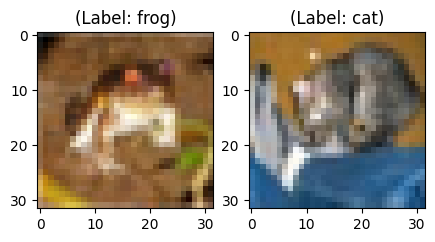

In [29]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

Even though the above two images are blurry, you can still somehow observe that the first image is a frog with the label ``frog``, while the second image is of a cat with the label ``cat``.

## Data Visualization using PCA

Now comes the most exciting part of this tutorial. As you learned earlier that PCA projects turn high-dimensional data into a low-dimensional principal component, now is the time to visualize that with the help of Python!

### Visualizing the Breast Cancer data

- You start by <b>``Standardizing``</b> the data since PCA's output is influenced based on the scale of the features of the data.
- It is a common practice to normalize your data before feeding it to any machine learning algorithm.

- To apply normalization, you will import ``StandardScaler`` module from the sklearn library and select only the features from the ``breast_dataset`` you created in the Data Exploration step. Once you have the features, you will then apply scaling by doing ``fit_transform`` on the feature data.

- While applying StandardScaler, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.



In [30]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [31]:
x.shape

(569, 30)

Let's check whether the normalized data has a mean of zero and a standard deviation of one.


In [32]:
np.mean(x),np.std(x)

(-6.118909323768877e-16, 1.0)

Let's convert the normalized features into a tabular format with the help of DataFrame.


In [33]:
feat_cols = ['feature' + str(i) for i in range(x.shape[1])]

In [34]:
normalised_breast = pd.DataFrame(x,columns=feat_cols)

In [35]:
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,-0.070279,0.383092,-0.157449,-0.466152,0.049342,-1.163516,-1.057501,-1.913447,0.752830,-0.382754,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


- Now comes the critical part, the next few lines of code will be projecting the thirty-dimensional Breast Cancer data to two-dimensional <b>``principal components``</b>.

- You will use the sklearn library to import the ``PCA`` module, and in the PCA method, you will pass the number of components (n_components=2) and finally call fit_transform on the aggregate data. Here, several components represent the lower dimension in which you will project your higher dimension data.



In [36]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

Next, let's create a DataFrame that will have the principal component values for all 569 samples.


In [37]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

In [38]:
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


- Once you have the principal components, you can find the <b>``explained_variance_ratio``</b>. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.


In [39]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


From the above output, you can observe that the ``principal component 1`` holds 44.2% of the information while the ``principal component 2`` holds only 19% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 36.8% information was lost.

Let's plot the visualization of the 569 samples along the ``principal component - 1`` and ``principal component - 2`` axis. It should give you good insight into how your samples are distributed among the two classes.


<Figure size 640x480 with 0 Axes>

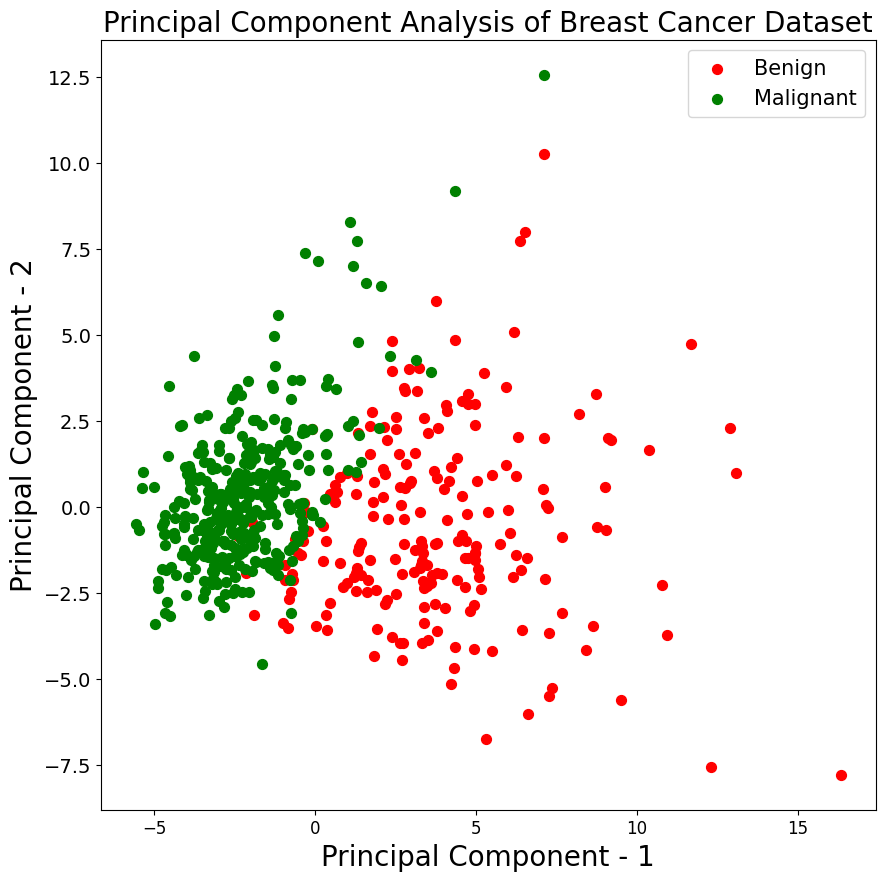

In [41]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15});

From the above graph, you can observe that the two classes ``benign`` and ``malignant``, when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the ``benign`` class is spread out as compared to the ``malignant`` class.

### Visualizing the CIFAR - 10 data

The following lines of code for visualizing the CIFAR-10 data is pretty similar to the PCA visualization of the Breast Cancer data.

- Let's quickly check the maximum and minimum values of the CIFAR-10 training images and <b>``normalize``</b> the pixels between 0 and 1 inclusive.


In [42]:
np.min(x_train),np.max(x_train)

(0, 255)

In [43]:
x_train = x_train/255.0

In [44]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [45]:
x_train.shape

(800, 32, 32, 3)

Next, you will create a DataFrame that will hold the pixel values of the images along with their respective labels in a row-column format.

But before that, let's reshape the image dimensions from three to one (flatten the images).


In [46]:
x_train_flat = x_train.reshape(-1,3072)

In [47]:
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

In [48]:
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)

In [49]:
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (800, 3073)


Perfect! The size of the dataframe is correct since there are 50,000 training images, each having 3072 pixels and an additional column for labels so in total 3073.

PCA will be applied on all the columns except the last one, which is the label for each image.


In [50]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel3033,pixel3034,pixel3035,pixel3036,pixel3037,pixel3038,pixel3039,pixel3040,pixel3041,pixel3042,pixel3043,pixel3044,pixel3045,pixel3046,pixel3047,pixel3048,pixel3049,pixel3050,pixel3051,pixel3052,pixel3053,pixel3054,pixel3055,pixel3056,pixel3057,pixel3058,pixel3059,pixel3060,pixel3061,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,0.211765,0.164706,0.384314,0.286275,0.203922,0.466667,0.356863,0.247059,0.545098,0.419608,0.294118,0.568627,0.431373,0.313725,0.584314,0.458824,0.349020,0.584314,0.470588,0.364706,0.513725,0.403922,0.301961,0.490196,0.388235,0.298039,0.556863,0.450980,0.356863,0.564706,...,0.580392,0.403922,0.301961,0.631373,0.411765,0.270588,0.564706,0.372549,0.215686,0.439216,0.352941,0.231373,0.466667,0.356863,0.227451,0.509804,0.376471,0.254902,0.470588,0.341176,0.231373,0.360784,0.262745,0.180392,0.403922,0.305882,0.223529,0.666667,0.549020,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,0.396078,0.388235,0.490196,0.513725,0.545098,0.607843,0.650980,0.705882,0.674510,0.745098,0.823529,0.705882,0.780392,0.839216,0.556863,0.611765,0.611765,0.435294,0.470588,0.431373,0.415686,0.419608,0.384314,0.427451,0.407843,0.400000,0.482353,0.474510,0.458824,0.498039,...,0.019608,0.023529,0.043137,0.023529,0.023529,0.043137,0.039216,0.035294,0.047059,0.098039,0.086275,0.086275,0.200000,0.176471,0.164706,0.266667,0.250980,0.262745,0.352941,0.352941,0.396078,0.454902,0.443137,0.478431,0.525490,0.498039,0.521569,0.549020,0.509804,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.298039,0.352941,0.352941,0.282353,0.337255,0.337255,0.250980,0.305882,0.305882,0.250980,0.305882,0.305882,0.270588,0.325490,0.325490,0.258824,0.313725,0.313725,0.215686,0.270588,0.270588,0.203922,0.258824,0.258824,0.227451,0.282353,0.282353,0.266667,0.313725,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,0.145098,0.090196,0.172549,0.152941,0.098039,0.156863,0.145098,0.086275,0.156863,0.149020,0.090196,0.094118,0.090196,0.035294,0.125490,0.098039,0.058824,0.168627,0.105882,0.074510,0.117647,0.078431,0.039216,0.125490,0.117647,0.066667,0.160784,0.145098,0.090196,0.203922,...,0.478431,0.388235,0.262745,0.419608,0.333333,0.211765,0.439216,0.376471,0.258824,0.360784,0.317647,0.207843,0.313725,0.243137,0.152941,0.376471,0.305882,0.231373,0.301961,0.262745,0.164706,0.333333,0.298039,0.172549,0.329412,0.294118,0.188235,0.262745,0.223529,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,0.756863,0.827451,0.709804,0.768627,0.854902,0.694118,0.764706,0.862745,0.709804,0.764706,0.874510,0.721569,0.752941,0.874510,0.741176,0.745098,0.874510,0.741176,0.741176,0.870588,0.737255,0.756863,0.878431,0.717647,0.760784,0.874510,0.713725,0.760784,0.874510,0.721569,...,0.364706,0.384314,0.400000,0.352941,0.372549,0.

- Next, you will create the PCA method and pass the number of components as two and apply ``fit_transform`` on the training data, this can take few seconds since there are 50,000 samples


In [51]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:1000,:-1])

Then you will convert the principal components for each of the 50,000 images from a numpy array to a pandas DataFrame.


In [52]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

In [53]:
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.647671,1.990157,6
1,0.891439,-1.805314,9
2,8.013133,-10.264463,9
3,-10.416198,-0.580872,4
4,-2.317651,-4.752451,1


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>principal component 1</th>
      <th>principal component 2</th>
      <th>y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>-6.401018</td>
      <td>2.729039</td>
      <td>6</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.829783</td>
      <td>-0.949943</td>
      <td>9</td>
    </tr>
    <tr>
      <th>2</th>
      <td>7.730200</td>
      <td>-11.522102</td>
      <td>9</td>
    </tr>
    <tr>
      <th>3</th>
      <td>-10.347817</td>
      <td>0.010738</td>
      <td>4</td>
    </tr>
    <tr>
      <th>4</th>
      <td>-2.625651</td>
      <td>-4.969240</td>
      <td>1</td>
    </tr>
  </tbody>
</table>
</div>


- Let's quickly find out the amount of information or ``variance`` the principal components hold.


In [54]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.28986339 0.11142274]


    Explained variation per principal component: [0.2907663  0.11253144]

Well, it looks like a decent amount of information was retained by the principal components 1 and 2, given that the data was projected from 3072 dimensions to a mere two principal components.

Its time to visualize the CIFAR-10 data in a two-dimensional space. Remember that there is some semantic class overlap in this dataset which means that a frog can have a slightly similar shape of a cat or a deer with a dog; especially when projected in a two-dimensional space. The differences between them might not be captured that well.


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

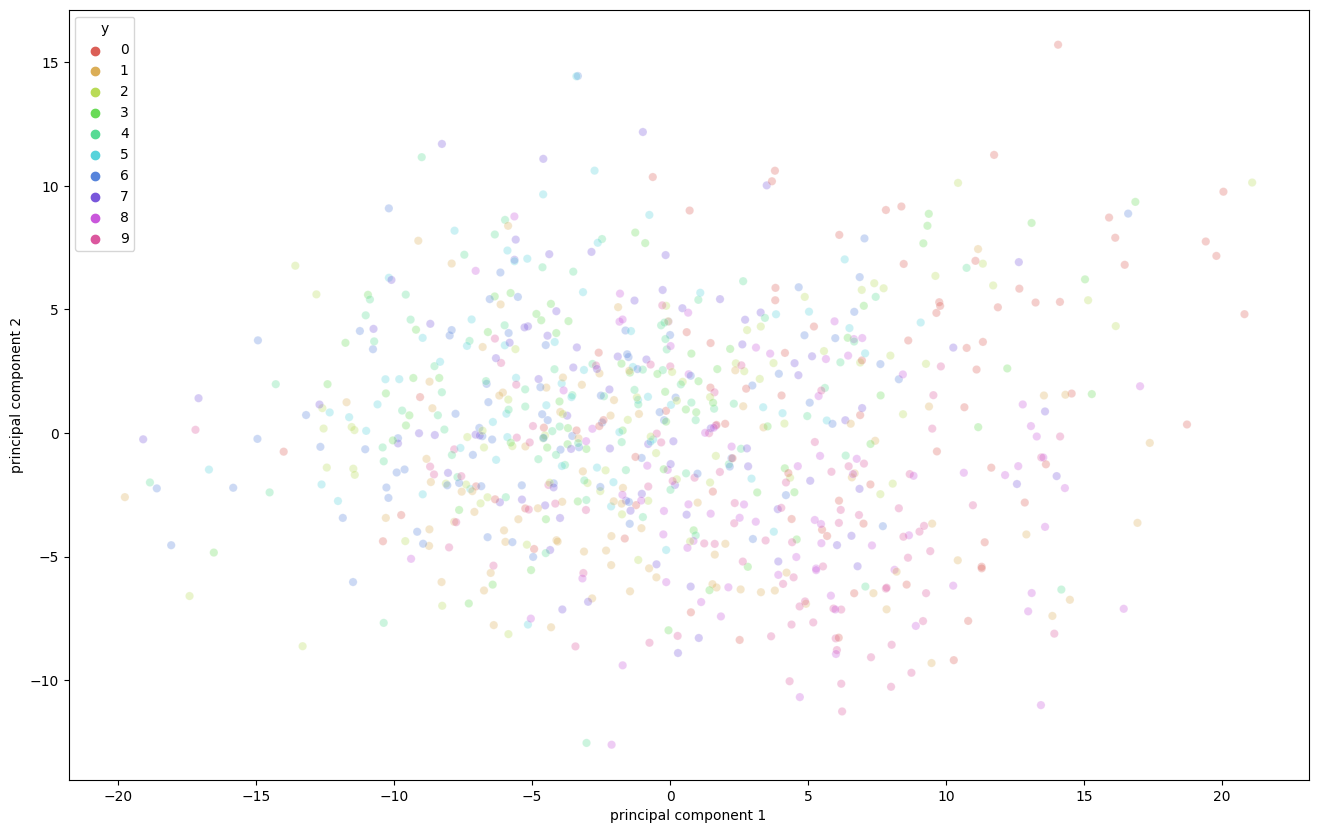

In [55]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

From the above figure, you can observe that some variation was captured by the principal components since there is some structure in the points when projected along the two principal component axis. The points belonging to the same class are close to each other, and the points or images that are very different semantically are further away from each other.

## Speed Up Deep Learning Training using PCA with CIFAR - 10 Dataset

In this final segment of the tutorial, you will be learning about how you can speed up your Deep Learning Model's training process using PCA.

**Note**: To learn basic terminologies that will be used in this section, please feel free to check out <a href="
https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python">this tutorial</a>.

First, let's normalize the training and testing images. If you remember the training images were normalized in the PCA visualization part, so you only need to normalize the testing images. So, let's quickly do that!


In [56]:
x_test = x_test/255.0

In [57]:
x_test = x_test.reshape(-1,32,32,3)

Let's ``reshape`` the test data.


In [58]:
x_test_flat = x_test.reshape(-1,3072)

Next, you will make the instance of the PCA model.

Here, you can also pass how much variance you want PCA to capture. Let's pass 0.9 as a parameter to the PCA model, which means that PCA will hold 90% of the variance and the ``number of components`` required to capture 90% variance will be used.

Note that earlier you passed ``n_components`` as a parameter and you could then find out how much variance was captured by those two components. But here we explicitly mention how much variance we would like PCA to capture and hence, the ``n_components`` will vary based on the variance parameter.

If you do not pass any variance, then the number of components will be equal to the original dimension of the data.


In [59]:
pca = PCA(0.9)

Then you will fit the ``PCA`` instance on the training images.


In [60]:
pca.fit(x_train_flat)

PCA(n_components=0.9)

Now let's find out how many ``n_components`` PCA used to capture 0.9 variance.


In [61]:
pca.n_components_

83

From the above output, you can observe that to achieve 90% variance, the dimension was reduced to ``83`` principal components from the actual ``3072`` dimensions.

Finally, you will apply ``transform`` on both the training and test set to generate a transformed dataset from the parameters generated from the ``fit`` method.


In [62]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

Next, let's quickly import the necessary libraries to run the deep learning model.


In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop

Now, you will convert your training and testing labels to one-hot encoding vector.


In [64]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Let's define the number of epochs, number of classes, and the batch size for your model.


In [65]:
batch_size = 128
num_classes = 10
epochs = 20

Next, you will define your ``Sequential`` model!


In [66]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(83,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

2022-12-20 00:39:14.804425: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-20 00:39:14.804450: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-20 00:39:14.804471: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c8491ecf-f17e-4257-83af-7078a2d9f187): /proc/driver/nvidia/version does not exist
2022-12-20 00:39:14.804723: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Let's print the model summary.


In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              86016     
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,794,314
Trainable params: 1,794,314
Non-trainable params: 0
_________________________________________________________________


Finally, it's time to compile and train the model!


In [68]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

Epoch 1/20
7/7 [==============================] - 1s 78ms/step - loss: 2.4657 - accuracy: 0.1600 - val_loss: 2.2461 - val_accuracy: 0.2150
Epoch 2/20
7/7 [==============================] - 0s 43ms/step - loss: 1.9417 - accuracy: 0.3338 - val_loss: 2.2291 - val_accuracy: 0.2450
Epoch 3/20
7/7 [==============================] - 0s 43ms/step - loss: 1.8154 - accuracy: 0.3663 - val_loss: 1.9311 - val_accuracy: 0.3150
Epoch 4/20
7/7 [==============================] - 0s 36ms/step - loss: 1.5163 - accuracy: 0.4913 - val_loss: 2.6328 - val_accuracy: 0.2100
Epoch 5/20
7/7 [==============================] - 0s 38ms/step - loss: 1.4869 - accuracy: 0.4800 - val_loss: 2.4759 - val_accuracy: 0.2350
Epoch 6/20
7/7 [==============================] - 0s 47ms/step - loss: 1.1980 - accuracy: 0.5850 - val_loss: 2.5324 - val_accuracy: 0.2700
Epoch 7/20
7/7 [==============================] - 0s 45ms/step - loss: 1.0969 - accuracy: 0.6300 - val_loss: 2.2596 - val_accuracy: 0.3100
Epoch 8/20
7/7 [===========

From the above output, you can observe that the time taken for training each epoch was just ``7 seconds`` on a CPU. The model did a decent job on the training data, achieving ``70%`` accuracy while it achieved only ``56%`` accuracy on the test dat. This means that it overfitted the training data. However, remember that the data was projected to 99 dimensions from 3072 dimensions and despite that it did a great job!

Finally, let's see how much time the model takes to train on the original dataset and how much accuracy it can achieve using the same deep learning model.


In [69]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))

Epoch 1/20
7/7 [==============================] - 1s 111ms/step - loss: 10.0539 - accuracy: 0.0988 - val_loss: 2.4622 - val_accuracy: 0.0900
Epoch 2/20
7/7 [==============================] - 1s 88ms/step - loss: 2.3633 - accuracy: 0.1050 - val_loss: 2.3198 - val_accuracy: 0.1550
Epoch 3/20
7/7 [==============================] - 1s 84ms/step - loss: 2.2637 - accuracy: 0.1400 - val_loss: 2.3274 - val_accuracy: 0.1000
Epoch 4/20
7/7 [==============================] - 1s 97ms/step - loss: 2.2723 - accuracy: 0.1425 - val_loss: 2.3816 - val_accuracy: 0.0700
Epoch 5/20
7/7 [==============================] - 1s 91ms/step - loss: 2.2310 - accuracy: 0.1488 - val_loss: 2.3283 - val_accuracy: 0.1350
Epoch 6/20
7/7 [==============================] - 1s 87ms/step - loss: 2.2281 - accuracy: 0.1762 - val_loss: 2.1715 - val_accuracy: 0.1700
Epoch 7/20
7/7 [==============================] - 1s 84ms/step - loss: 2.2388 - accuracy: 0.1538 - val_loss: 2.6121 - val_accuracy: 0.0950
Epoch 8/20
7/7 [=========

Voila! From the above output, it is quite evident that the time taken for training each epoch was around ``23 seconds`` on a CPU which was almost three times more than the model trained on the PCA output.

Moreover, both the training and testing accuracy is less than the accuracy you achieved with the 99 principal components as an input to the model.

So, by applying PCA on the training data you were able to train your deep learning algorithm not only ``fast``, but it also achieved better ``accuracy`` on the testing data when compared with the deep learning algorithm trained with original training data.

## Go Further!

Congratulations on finishing the tutorial.

This tutorial was an excellent and comprehensive introduction to PCA in Python, which covered both the theoretical, as well as, the practical concepts of PCA.

If you want to dive deeper into dimensionality reduction techniques then consider reading about t-distributed Stochastic Neighbor Embedding commonly known as <a href="
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html">tSNE</a>, which is a non-linear probabilistic dimensionality reduction technique.

If you would like to learn more about unsupervised learning techniques like PCA, take DataCamp's <a href="https://www.datacamp.com/courses/unsupervised-learning-in-python">Unsupervised Learning in Python</a> course.

References:

 - <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">PCA in Sklearn</a>
 - <a href="https://www.datacamp.com/community/tutorials/pca-analysis-r">Principal Component Analysis in R</a>
 - <a href="https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60">PCA using Python (scikit-learn)</a>

Please feel free to ask any questions related to this tutorial in the comments section below.